# Sistema de predicción del clima

# Nombres 
### Luisa Fernanda Cotte Sánchez; Cristian Giovanny Sánchez Pineda 

In [1]:
# dependecias para todo el taller. No se deben agregar más dependecias
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Se cuenta con la información sobre el clima de los meses de enero a mayo del 2017. Se necesita generar la regresión que mejor se ajuste al comportamiento climático de dichos meses.

In [2]:
df = pd.read_csv('time_series.csv',  parse_dates=[0], header=None,index_col=0, squeeze=True,names=['fecha','unidades'])
t = df['2017-01-01':'2017-05-30']

1- Grafique el comportamiento climático almacenado en t (0.2).

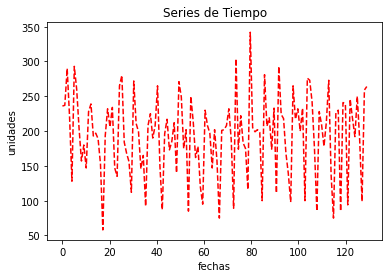

In [3]:
x = np.linspace(0, len(t), len(t))
plt.plot(x, t,'r--')#Corregir por los números no con lo de Einer, o sea las fechas
plt.ylabel('unidades')
plt.xlabel('fechas')
plt.title('Series de Tiempo')
plt.show()

2- Desarrolle una función con la cual se pueda generar phi con cualquiera de las tres funciones base (Polinomial, Exponencial y Sigmoildal). Para las funciones exponencial y sigmoidal genere los valores de la media con un $linspace$ entre 0 y 1 de tamaño $m$. Para la funcion exponencial use $s = 0.007$ y para la sigmoidal $s = 0.01$ (0.8).

In [4]:
def get_polinomial(x, i):
    '''
    Obtiene la polinomial de x a la i
    '''
    return x**i

def get_exponential(x, miu):
    '''
    Obtiene la exponencial de x dependiendo de la función base
    '''
    return np.exp((-(((x-miu)**2)/(2*((0.007)**2)))))

def get_sigmoidal(x, miu):
    '''
    Obtiene la sigmoidal de x dependiendo de la función base
    '''
    return 1/(1+np.exp(-((x-miu)/(0.01))))

def polinomial(X, m, x):
    '''
    Llena la matriz X usando la función base polinomial
    '''
    i_limit, j_limit = X.shape
    for i in range(i_limit):
        for j in range(j_limit):
            X[i][j] = get_polinomial(x[i], j)
            
def exponential(X, m, x):
    '''
    Llena la matriz X usando la función base exponencial
    '''
    i_limit, j_limit = X.shape
    for i in range(1, i_limit):
        for j in range(j_limit):
            X[i][j]= get_exponential(x[i], m[j])
    X[:,0] = 1
            
def sigmoidal(X, m, x):
    '''
    Llena la matriz X usando la función base sigmoidal
    '''
    i_limit, j_limit = X.shape
    
    for i in range(1, i_limit):
        for j in range(j_limit):
            X[i][j] = get_sigmoidal(x[i], m[j])
    X[:,0]=1

def get_phi(fn, x, m):
    '''
    Obtiene phi
    '''
    medium = np.linspace(0,1, m)
    X = np.zeros((len(x),m)) #Tamaño de t por m
    fn(X, medium, x)
    return X



3- Desarrolle dos funciones, una para generar W y otra para calcular el error medio cuadrático (0.5).

In [5]:
def get_W(fn, x, m, c=t):
    '''
    Calcula el W mediante la formula
    '''
    phi = get_phi(fn, x, m)
    T = np.array([t])
    Y = ((np.linalg.inv((phi.T.dot(phi)))).dot(phi.T))
    T = T.T
    #129,10  -> 129,1
    #No importa la transpuesta, se genera #características X 1
    W =Y.dot(T)
    return W
#Error cuadrático medio trabaja sobre la función de abajo generada
def mean_square_error(Y, w):
    '''
    Calcula el error mediante la formula
    '''
    i_limit, j_limit = Y.shape
    error = 0    
    sum = 0
    for i in range(i_limit):
        for j in range(j_limit):
            sum += (Y[i][j]-t[i])**2
    error = (sum/(2*len(t)))
    
    return error

x = [i for i in range(len(t))]
W = get_W(polinomial, x, 3)

X = get_phi(polinomial, x, 3)
Y = X.dot(W)#Se crean las predicciones
mse = mean_square_error(Y,W)
print(mse)
print(W)

1615.5555808977776
[[ 2.08252922e+02]
 [-6.96659299e-01]
 [ 5.53257663e-03]]


4- Usando la función polinomial proponga y grafique con tres M diferentes regresiones que se adaptes a los datos climáticos de enero a mayo del 2017. Las tres propuestas deben mostrar el comportamiento entre t y t prima con adaptaciones claramente diferentes. Para los gráficos use subplots. Calcule el error medio cuadrático y muestre los valores M, E, Titulo (0.7). 

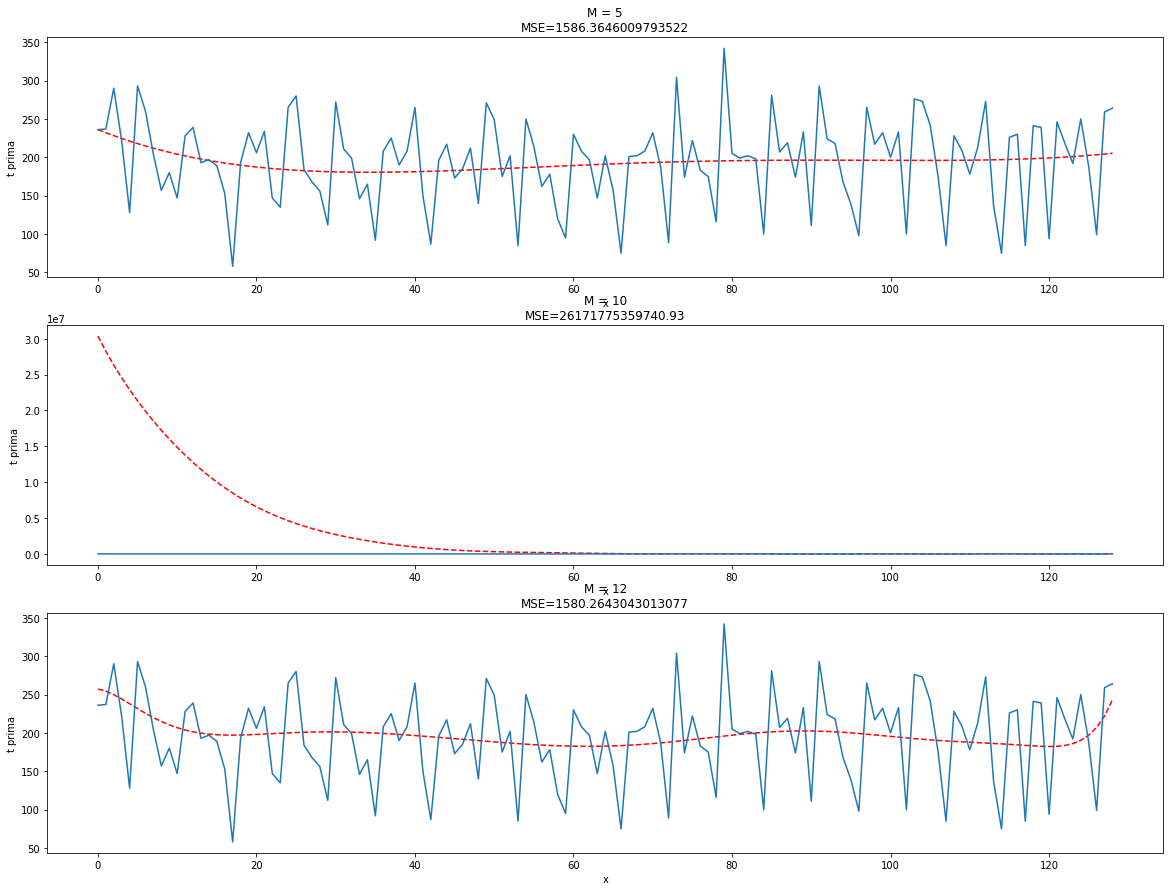

In [6]:

def get_y_values(Y):
    '''
    Método que permite obtener los valores de Y
    '''
    i_limit, j_limit = Y.shape
    y = []
    for i in range(i_limit):
        for j in range(j_limit):
            y.append(Y[i][j])
    return y
x = [i for i in range(len(t))]#Tabular valores de x

W = get_W(polinomial, x, 5)#Se Crea el primer W
#print(W)
X = get_phi(polinomial, x, 5)#Se crea phi
Y = X.dot(W)#Se crean las predicciones
mse1 = mean_square_error(Y, W)#Se crea el error cuadrático medio

y = get_y_values(Y)#Valores de y para graficar

W1 = get_W(polinomial, x, 40)#Se Crea el segundo W
#print(W)
X1 = get_phi(polinomial, x, 40)#Se crea el segundo phi
Y1 = X1.dot(W1)#Se crean las predicciones 2

y1 = get_y_values(Y1)#Se crean los valores para tabular 2
mse2 =  mean_square_error(Y1, W1)#Se genera el error cuadrático medio 2

W2 = get_W(polinomial, x, 12)#Se crea el W3
#print(W)
X2 = get_phi(polinomial, x, 12)#Se crea el phi3
Y2 = X2.dot(W2)#Se creean las predicciones 3
y2 = get_y_values(Y2)#Se generan los valores para tabular

mse3 =  mean_square_error(Y2, W2)#Se genera el error cuadrático medio

plt.subplots(3,1, figsize=(20,15))
plt.subplot(3,1,1)
plt.plot(x, y, 'r--', x, t)
plt.title("M = 5\nMSE="+str(mse1))
plt.ylabel('t prima')
plt.xlabel('x')
plt.subplot(3,1,2)
plt.plot(x, y1, 'r--', x, t)
plt.title("M = 10\nMSE="+str(mse2))
plt.ylabel('t prima')
plt.xlabel('x')
plt.subplot(3,1,3)
plt.plot(x, y2, 'r--', x, t)
plt.title("M = 12\nMSE="+str(mse3))
plt.ylabel('t prima')
plt.xlabel('x')
plt.show()

5- Usando la función exponencial proponga y grafique con tres M diferentes regresiones que se adaptes a los datos climáticos de enero a mayo del 2017. . Las tres propuestas deben mostrar el comportamiento entre t y t prima con adaptaciones claramente diferentes. Para los gráficos use subplots. Calcule el error medio cuadrático y muestre los valores de cada predicción en el titulo de la gráfica (0.7). 

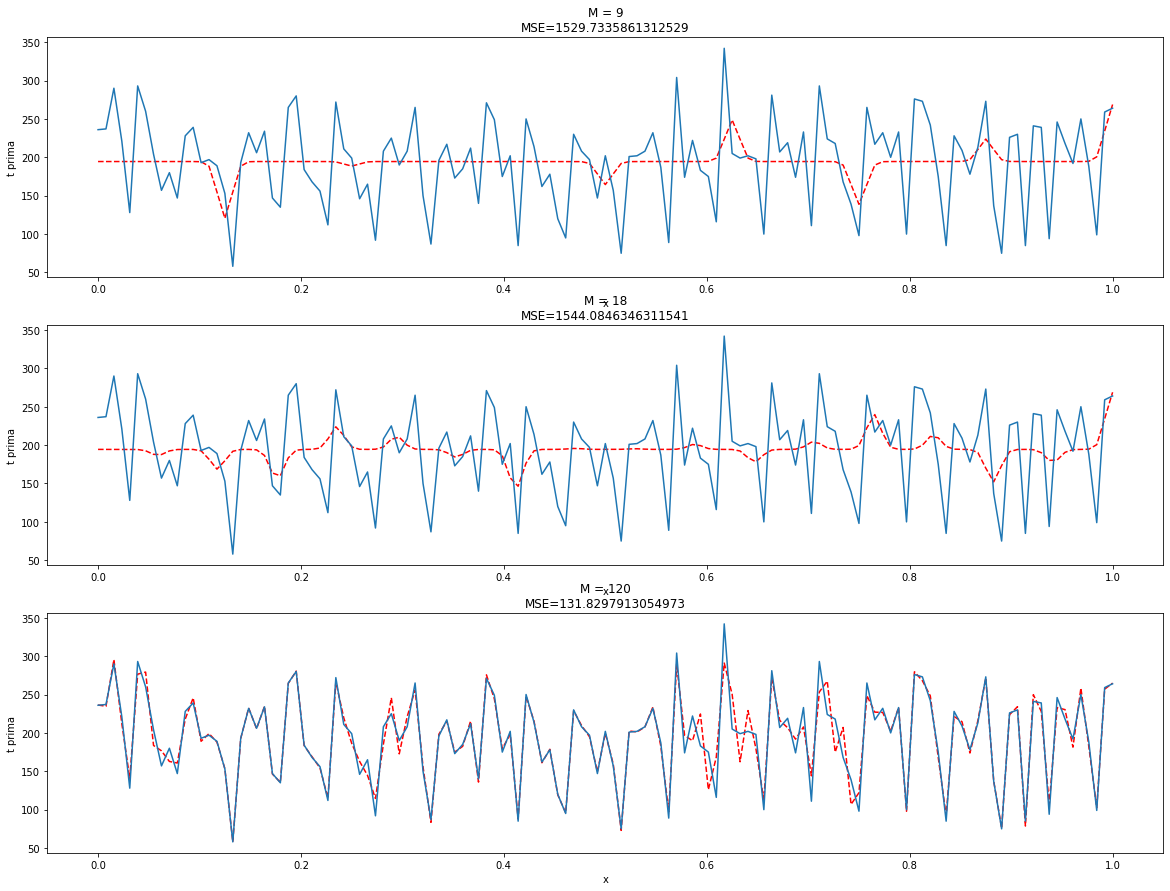

In [63]:
#LA gráfica no se puede parecer a las otras dos, deben ser diferentes todas 
x = np.linspace(0,1,len(t)) #Asociado a la media 
W = get_W(exponential, x, 9)
#print(W)
X = get_phi(exponential, x, 9)
Y = X.dot(W)

mse1 = mean_square_error(Y, W)

y = get_y_values(Y)

W1 = get_W(exponential, x, 18)
#print(W)
X1 = get_phi(exponential, x, 18)
Y1 = X1.dot(W1)

y1 = get_y_values(Y1)
mse2 =  mean_square_error(Y1, W1)

W2 = get_W(exponential, x, 120)
#print(W)
X2 = get_phi(exponential, x, 120)
Y2 = X2.dot(W2)
y2 = get_y_values(Y2)

mse3 =  mean_square_error(Y2, W2)

plt.subplots(1,3, figsize=(20,15))
plt.subplot(3,1,1)
plt.plot(x, y, 'r--', x, t)
plt.title("M = 9\nMSE="+str(mse1))
plt.ylabel('t prima')
plt.xlabel('x')
plt.subplot(3,1,2)
plt.plot(x, y1, 'r--', x, t)
plt.title("M = 18\nMSE="+str(mse2))
plt.ylabel('t prima')
plt.xlabel('x')
plt.subplot(3,1,3)
plt.plot(x, y2, 'r--',x,t)
plt.title("M = 120\nMSE="+str(mse3))
plt.ylabel('t prima')
plt.xlabel('x')
plt.show()

6- Usando la función sigmoidal proponga y grafique con tres M diferentes regresiones que se adaptes a los datos climáticos de enero a mayo del 2017. . Las tres propuestas deben mostrar el comportamiento entre t y t prima con adaptaciones claramente diferentes. Para los gráficos use subplots. Calcule el error medio cuadrático y muestre los valores de cada predicción en el titulo de la gráfica (0.7). 

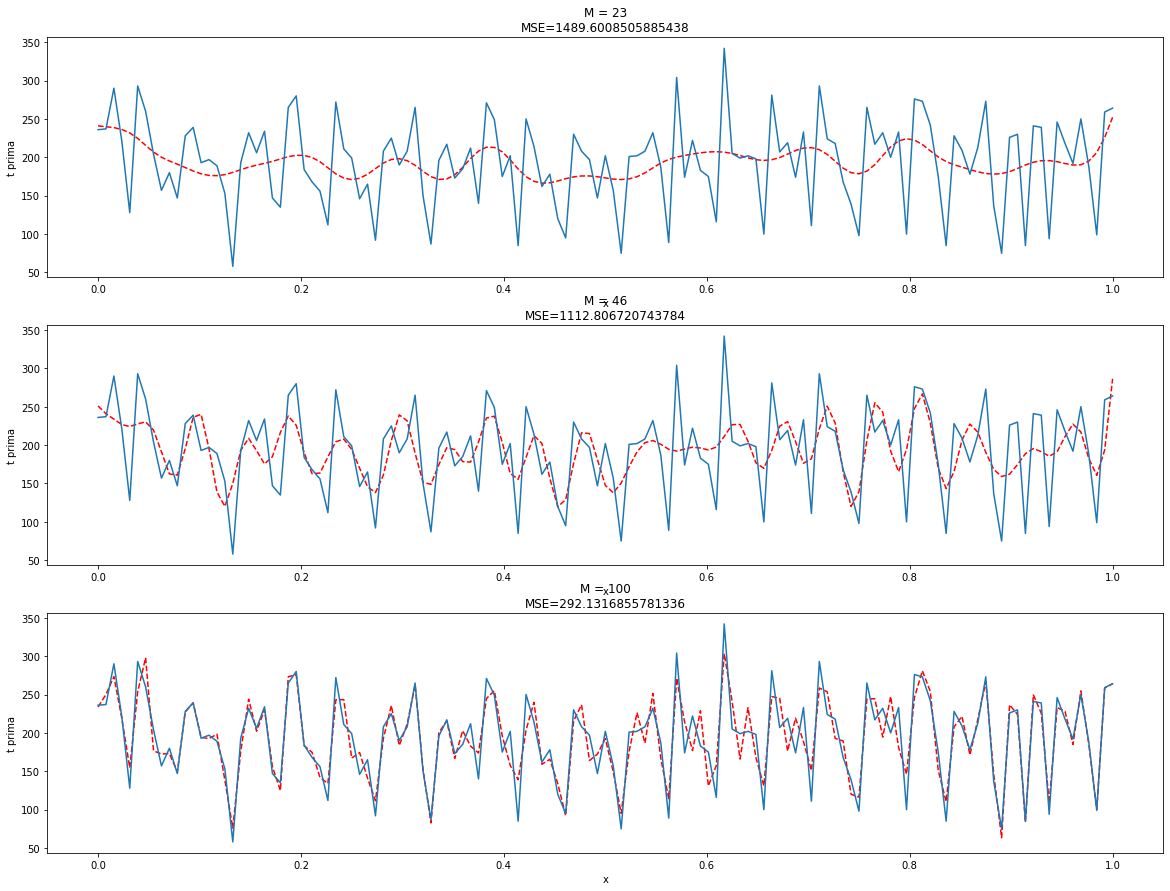

In [64]:
x = np.linspace(0,1,len(t))
W = get_W(sigmoidal, x, 23)
#print(W)
X = get_phi(sigmoidal, x, 23)
Y = X.dot(W)


mse1 = mean_square_error(Y, W)

y = get_y_values(Y)

W1 = get_W(sigmoidal, x, 46)
#print(W)
X1 = get_phi(sigmoidal, x, 46)

Y1 = X1.dot(W1)

y1 = get_y_values(Y1)
mse2 =  mean_square_error(Y1, W1)

W2 = get_W(sigmoidal, x, 100)
#print(W)
X2 = get_phi(sigmoidal, x, 100)
Y2 = X2.dot(W2)
y2 = get_y_values(Y2)

mse3 =  mean_square_error(Y2, W2)

plt.subplots(3,1, figsize=(20,15))
plt.subplot(3,1,1)
plt.plot(x, y, 'r--', x, t)
plt.title("M = 23\nMSE="+str(mse1))
plt.ylabel('t prima')
plt.xlabel('x')
plt.subplot(3,1,2)
plt.plot(x, y1, 'r--', x, t)
plt.title("M = 46\nMSE="+str(mse2))
plt.ylabel('t prima')
plt.xlabel('x')
plt.subplot(3,1,3)
plt.plot(x, y2, 'r--', x, t)
plt.title("M = 100\nMSE="+str(mse3))
plt.ylabel('t prima')
plt.xlabel('x')
plt.show()

7- ¿Cual solución piensa que es la mejor que se ajusta al comportamiento climático? Justifique (0.6).

Teniendo en cuenta los resultados de la función base polinomial, se realizó el aumento de las características con números muy cercanos, debido a que esta función tiende a crecer muy rápido con gran cantidad de características. Sin embargo, esta función no presentó un modelo que se ajustara adecuadamente a los datos.  

Analizando los resultados de la función base exponencial, se tomaron características entre 9, 18 y 120, de donde con 9 características se observan algunos picos que no se ajustan a los datos ya que la función tiende a ser lineal comparado con los datos. Para 18 características, se observa un comportamiento similar a trabajar con 9 caracerísticas, sin embargo, se obtiene un movimiento menos lineal. Con 120 características el modelo se adapta de una manera más exacta y el error es menor con respecto a los anteriores.

Utilizando la función base sigmoidal, se tenieron en cuenta números grandes en las características ya que anteriormente en la función exponencial, el comportamiento mejoró con 120 características, en este caso se  realizó la implementación del modelo con 23, 46 y 100 características. Para 23 características, la función tuvo un comportamiento suave con respecto a los datos originales, ya que ellos se comportan con muchos saltos. Con 46 características se adapta mejor a los datos ya que tiene saltos similares. Usando 100 características, se obtuvo un comportamiento casi exacto generando picos similares a los datos, y teniendo un error cuadrático medio mucho menor a los anteriores.

Teniendo en cuenta el análisis anterior, se elije el modelo basado en la función base exponencial con  m = 120, ya que el error es el menor de todos los 9 modelos, aunque con la función sigmoidal con m = 100 se comporta similar, se adapta mejor la  función exponencial con m = 120.


8- Realice la predicción del mes de junio del 2017 usando su mejor modelo encontrado en los puntos anteriores. Realice el grafico comparativo de su predicción con el valor real. Muestre en el gráfico solo la parte predecida (0.8).

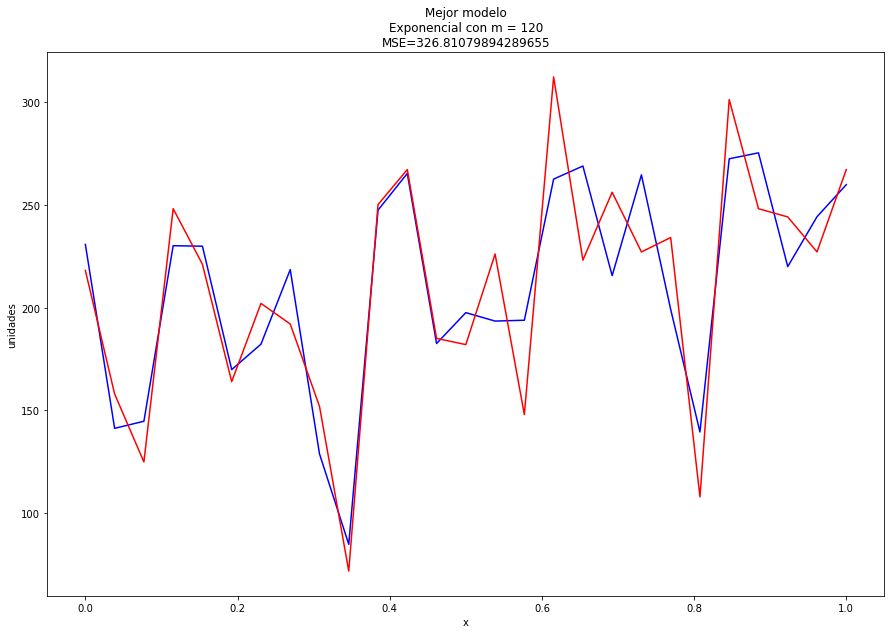

In [102]:
t = df['2017-01-01':'2017-06-30']#Aumentar el phi

x = np.linspace(0,1, len(t))

W2 = get_W(exponential, x, 120, t)
#print(W)
X2 = get_phi(exponential, x, 120)
Y2 = X2.dot(W2)
y2 = get_y_values(Y2)
mse3 =  mean_square_error(Y2, W2) 

t2 = df['2017-06-01':'2017-06-30']
x2 = np.linspace(0,1, len(t2))
y2 = y2[130:157]


plt.figure(figsize=(15,10))
plt.plot( x2,y2,'b',x2, t2,'r')
plt.title('Mejor modelo\nExponencial con m = 120\nMSE='+str(mse3))
plt.ylabel('unidades')
plt.xlabel('x')
plt.show()
